In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
stroke_rf = pd.read_csv('stroke_rf.csv')
pd.set_option('display.max_columns', None)
stroke_rf.head()

,Unnamed: 0,_AGE80,age,gender,race,stroke_status,smoking_status,diabetes_status,bmi_groups,physical_activity,heavy_drinker,illicit_drugs,heart_attack,angina_chd
0,0,56.0,8.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,2.0
1,1,65.0,10.0,2.0,2.0,2.0,9.0,3.0,2.0,1.0,9.0,NaN,2.0,2.0
2,2,65.0,10.0,2.0,2.0,2.0,4.0,3.0,9.0,1.0,1.0,NaN,2.0,2.0
3,3,80.0,13.0,2.0,1.0,2.0,4.0,3.0,9.0,2.0,1.0,NaN,2.0,2.0
4,4,80.0,13.0,2.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,NaN,2.0,2.0


# Mapping of Columns' Data

### smoking_status

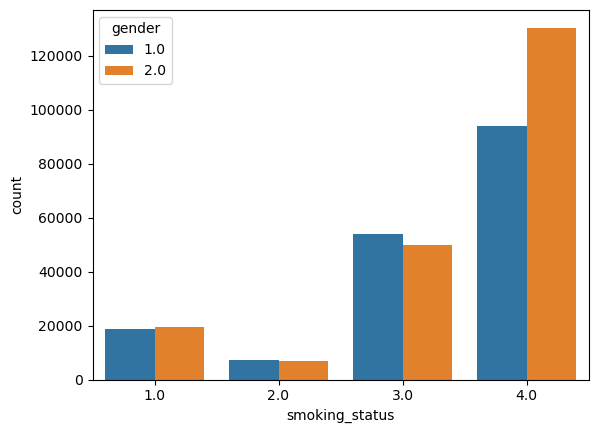

In [5]:
stroke_rf['smoking_status'].value_counts()

# Drop rows where 'smoking_status' is 9
stroke_rf.drop(stroke_rf[stroke_rf['smoking_status'] == 9].index, inplace=True)

# Replace values in 'smoking_status'
#chg = {2: 1, 3: 1, 4: 0}
#stroke_rf['smoking_status'].replace(to_replace=chg, inplace=True)

sns.countplot(x='smoking_status', hue='gender', data=stroke_rf)
plt.show()


In [6]:
stroke_rf['smoking_status'].unique()

array([1., 4., 3., 2.])

### stroke_status

In [7]:
stroke_rf['stroke_status'].unique()

array([2., 1., 7., 9.])

<AxesSubplot:xlabel='stroke_status', ylabel='count'>

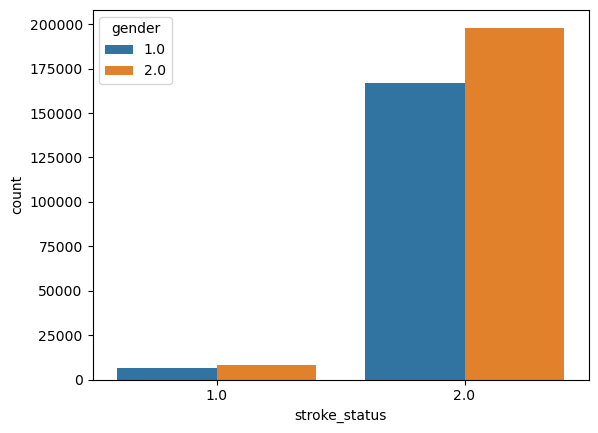

In [8]:
stroke_rf['stroke_status'].value_counts()
stroke_rf.drop(stroke_rf[stroke_rf['stroke_status'] == 7].index, inplace = True)
stroke_rf.drop(stroke_rf[stroke_rf['stroke_status'] == 9].index, inplace = True)
#df_selected = df_selected.rename(columns={"_AGE65YR":"Over 65 Years Old"})
sns.countplot(x='stroke_status', hue='gender', data=stroke_rf)

In [9]:
stroke_rf['heart_attack'].unique()

array([ 2.,  1.,  7.,  9., nan])

In [10]:
chg_stroke = {2: 0}
stroke_rf['stroke_status'].replace(to_replace=chg_stroke, inplace=True)


In [11]:
chg_age = {2: 1, 1: 0}
stroke_rf['age'].replace(to_replace=chg_age, inplace=True)

In [12]:
stroke_rf['age'].unique()

array([ 8., 10., 13., 12.,  5., 11.,  9.,  7.,  6.,  0., 14.,  4.,  1.,
        3.])

In [13]:
chg_gender = {2: 'Female', 1: 'Male'}
stroke_rf['gender'].replace(to_replace=chg_gender, inplace=True)

In [14]:
chg_race = {1: 'White', 2: 'Black', 'Asian': 'Acian', 4: 'Alaskan', 5: 'Hispanic', 6: 'Other'}
stroke_rf['race'].replace(to_replace=chg_race, inplace=True)

In [15]:
chg_smoking = {1: 'EveryDay', 2: 'SomeDay', 3: 'Former', 4: 'ANonSmk'}
stroke_rf['smoking_status'].replace(to_replace=chg_smoking, inplace=True)

In [16]:
stroke_rf['diabetes_status'].unique()

array([1., 3., 4., 2., 7., 9.])

In [17]:
stroke_rf.drop(stroke_rf[stroke_rf['diabetes_status'] == 7].index, inplace = True)
stroke_rf.drop(stroke_rf[stroke_rf['diabetes_status'] == 9].index, inplace = True)

chg_diabetes = {1: 'Diabetic', 2: 'PrgDiabetic', 3: 'ADiabetic', 4: 'ADiabetic'}
stroke_rf['diabetes_status'].replace(to_replace=chg_diabetes, inplace=True)

In [18]:
stroke_rf.drop(stroke_rf[stroke_rf['bmi_groups'] == 9].index, inplace = True)

chg_bmi = {1: 0, 2: 1}
stroke_rf['bmi_groups'].replace(to_replace=chg_bmi, inplace=True)

In [19]:
stroke_rf['bmi_groups'].unique()

array([0., 1.])

In [20]:
stroke_rf['heavy_drinker'].unique()

array([1., 9., 2.])

In [21]:
stroke_rf.drop(stroke_rf[stroke_rf['heavy_drinker'] == 9].index, inplace = True)

chg_drinker = {1: 0, 2: 1}
stroke_rf['heavy_drinker'].replace(to_replace=chg_drinker, inplace=True)

In [22]:
stroke_rf['heart_attack'].unique()

array([ 2.,  1.,  7.,  9., nan])

In [23]:
stroke_rf.drop(stroke_rf[stroke_rf['heart_attack'] == 7].index, inplace = True)
stroke_rf.drop(stroke_rf[stroke_rf['heart_attack'] == 9].index, inplace = True)

chg_hrtattack = {2: 0}
stroke_rf['heart_attack'].replace(to_replace=chg_hrtattack, inplace=True)

In [24]:
stroke_rf['physical_activity'].unique()

array([1., 2., 9.])

In [25]:
stroke_rf.drop(stroke_rf[stroke_rf['physical_activity'] == 9].index, inplace = True)

chg_phactivity = {2: 0}
stroke_rf['physical_activity'].replace(to_replace=chg_phactivity, inplace=True)

In [27]:
stroke_rf.rename(columns={"_AGE80": "_Age"}, inplace=True)

# Applying Logistic Regression Model

In [29]:
model = sm.GLM.from_formula("stroke_status ~ smoking_status + _Age + race + bmi_groups + diabetes_status + heavy_drinker + heart_attack + physical_activity", family=sm.families.Binomial(), data=stroke_rf)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          stroke_status   No. Observations:               339803
Model:                            GLM   Df Residuals:                   339787
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -49506.
Date:                Fri, 19 Jan 2024   Deviance:                       99012.
Time:                        19:48:04   Pearson chi2:                 3.06e+05
No. Iterations:                     8   Pseudo R-squ. (CS):            0.04184
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -6.2583      0.096    -65.091      0.000      -6.447      -6.070
smoking_status[T.EveryDay]         0.6539      0.029     22.778      0.000       0.598       0.710
smoking_status[T.Former]           0.2148      0.021     10.396      0.000       0.174       0.255
smoking_status[T.SomeDay]          0.6704      0.044     15.297      0.000       0.584       0.756
race[T.Alaskan]                    0.5937      0.101      5.900      0.000       0.396       0.791
race[T.Black]                      0.6484      0.087      7.484      0.000       0.479       0.818
race[T.Hispanic]                   0.0053      0.091      0.058      0.953      -0.174       0.184
race[T.Other]                      0.5296      0.094      5.652      0.000       0.346       0.713
race[T.White]                      0.1343      0.083      1.626      0.104      -0.028       0.296
diabetes_status[T.Diabetic]        0.5376      0.021     25.488      0.000       0.496       0.579
diabetes_status[T.PrgDiabetic]     0.2981      0.112      2.654      0.008       0.078       0.518
_Age                               0.0439      0.001     58.325      0.000       0.042       0.045
bmi_groups                         0.0398      0.021      1.923      0.055      -0.001       0.080
heavy_drinker                     -0.2603      0.045     -5.785      0.000      -0.349      -0.172
heart_attack                       1.3723      0.022     61.330      0.000       1.328       1.416
physical_activity                 -0.4170      0.019    -21.662      0.000      -0.455      -0.379
==================================================================================================
"""

**Removing BMI Groups as the P-value of this varible is not significant i.e. the P-value is greater than 0.05**

In [39]:
model = sm.GLM.from_formula("stroke_status ~ smoking_status + _Age + race + diabetes_status + heavy_drinker + heart_attack + physical_activity", family=sm.families.Binomial(), data=stroke_rf)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          stroke_status   No. Observations:               339803
Model:                            GLM   Df Residuals:                   339788
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -49508.
Date:                Tue, 23 Jan 2024   Deviance:                       99016.
Time:                        23:57:58   Pearson chi2:                 3.06e+05
No. Iterations:                     8   Pseudo R-squ. (CS):            0.04183
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -6.2293      0.095    -65.641      0.000      -6.415      -6.043
smoking_status[T.EveryDay]         0.6499      0.029     22.698      0.000       0.594       0.706
smoking_status[T.Former]           0.2160      0.021     10.457      0.000       0.175       0.256
smoking_status[T.SomeDay]          0.6666      0.044     15.227      0.000       0.581       0.752
race[T.Alaskan]                    0.6033      0.101      6.003      0.000       0.406       0.800
race[T.Black]                      0.6591      0.086      7.623      0.000       0.490       0.829
race[T.Hispanic]                   0.0143      0.091      0.157      0.875      -0.164       0.193
race[T.Other]                      0.5391      0.094      5.762      0.000       0.356       0.723
race[T.White]                      0.1432      0.082      1.736      0.083      -0.018       0.305
diabetes_status[T.Diabetic]        0.5444      0.021     26.174      0.000       0.504       0.585
diabetes_status[T.PrgDiabetic]     0.2964      0.112      2.639      0.008       0.076       0.516
_Age                               0.0437      0.001     58.520      0.000       0.042       0.045
heavy_drinker                     -0.2621      0.045     -5.824      0.000      -0.350      -0.174
heart_attack                       1.3733      0.022     61.386      0.000       1.329       1.417
physical_activity                 -0.4197      0.019    -21.850      0.000      -0.457      -0.382
==================================================================================================
"""

## Final results of the Logistic Regression Model

The logistic regression results indicate the following relationships between various covariates and the odds of having a stroke:

**Intercept:** 

The baseline odds of having a stroke, when all predictors are at their reference levels, is approximately 0.002.

**Smoking Status:**

- *Every day smokers* have about 1.92 times higher odds of having a stroke compared to *non-smokers.*
- *Former smokers* have about 1.24 times higher odds of having a stroke compared to *non-smokers.*
- *Some day smokers* have about 1.96 times higher odds of having a stroke compared to *non-smokers.*

**Race:**

- *Alaskans* have about 1.81 times higher odds of having a stroke compared to *Asians.*
- *Black* people have about 1.91 times higher odds of having a stroke compared to *Asians.*
- *Hispanic* people have about 1.01 times higher odds of having a stroke compared to *Asians.*
- *White* people have about 1.7 times higher odds of having a stroke compared to *Asians.*
- *Races* other than those mentioned have about 1.343 times higher odds of having a stroke compared to *Asians.*

**Diabetes Status:**

- *Diabetic individuals* have about 1.7 times higher odds of having a stroke compared to *non-diabetic individuals.*
- *Diabetic pregnant women* have about 1.35 times higher odds of having a stroke compared to *non-diabetic individuals.*

**Age (_Age):** 

For every one-year increase in age, the odds of having a stroke increase by a factor of 1.04.

**Heavy Drinker:** 

*Heavy drinkers* have about 0.77 times lower odds of having a stroke compared to individuals who are not *heavy drinkers.*

**Heart Attack:** 

Individuals who had a heart attack have about 3.94 times higher odds of having a stroke compared to individuals who didn't have a heart attack.

**Physical Activity:** 

*Physically active* individuals have about 0.66 times lower odds of having a stroke compared to *physically inactive* individuals.